# Compensation Notebook for Extensive Analysis

Hi! Welcome :) This code was originally created by Marilena Lykiardopoulou and was automated and commented by Annabelle Czihaly. 

The goal of this script is to create composite compensation plots like this one: 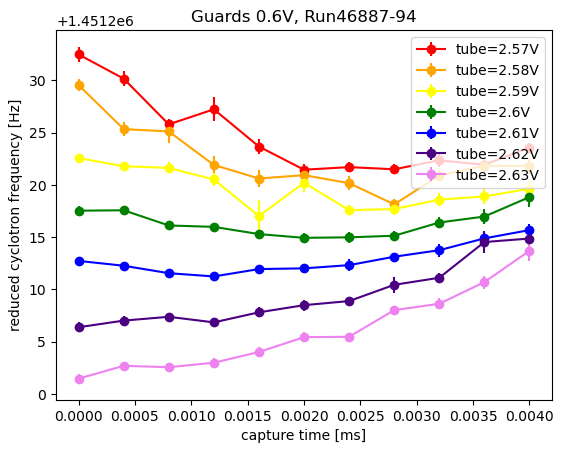The fitting plots and composite plot are created manually and require fitting parameters to be entered for each run. This is ideal for a detailed analysis. If you are looking to make an automatic composite plot, please see Compensation Notebook for Quick Analysis.

Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define various plotting functions

In [2]:
def gaussian(x, a, b, c, d):
    return -a*np.exp(-(x-b)**2/(2*c**2))+d

def line(x,a,b):
    return a*x+b

def parabola(x,a,b,c):
    return a*(x-b)**2+c

#### define tof_resonance which needs 4 inputs: a dataframe, center frequency, deviation, npoints

In [3]:
def tof_res(df, fc, dev, npoints): 

    ToF = []
    counts = []
    err_ToF = []
    x = []
    sigma = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof']))
        err_ToF.append(np.std(df_i['tof'])/np.sqrt(len(df))) 
        sigma.append(np.std(df_i['tof']))
        x.append(fc-dev+i*((dev*2)/(npoints))) 
        counts.append(len(df_i['tof']))
        
    return ToF, counts, err_ToF, x, sigma

#### define fit_ref 

In [4]:
def fit_ref(df, fc, dev, npoints, p0, tof): # fits resonance for different capture times and outputs center frequency and error
    
    centre_freq = []
    err_center_freq = []
    capture_times = []
    
    # if fitting multiple resonances, have range start at 0
    # if fitting a single resonance, have range start at -1
    
    for i in range(0, max(df['y_step_idx'])+1): 
        df_i = df.loc[df['y_step_idx']==i]
        df_j = df_i.loc[df_i['tof']<=tof]
        
        ToF, counts, err_ToF, x, sigma = tof_res(df_j, fc, dev, npoints)
        
        # turn df_i['step_value_ppg'] into a list
        # from this list, remove all [] brackets
        # make all values floats
        # get the average of them 
        
        capture_times.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
        popt, pcov = curve_fit(gaussian, x, ToF, p0, bounds = ([p0[0]-10, p0[1]-60,p0[2]-5,p0[3]-20],[p0[0]+10, p0[1]+60,p0[2]+5,p0[3]+20]))
        a,b,c,d = popt
        perr = np.sqrt(np.diag(pcov))
        print(popt)
        centre_freq.append(popt[1])
        err_center_freq.append(perr[1])
        plt.figure()
    
        plt.errorbar(x, ToF, err_ToF, label = 'Scan'+str(i))
        plt.plot(x, gaussian(x,a,b,c,d), label = 'fit', color='fuchsia')
        plt.plot(x, gaussian(np.array(x),int(p0[0]),int(p0[1]),int(p0[2]),int(p0[3])), label = 'guess', color='green', linestyle='dashed')
        plt.legend()
        plt.xlabel('Dipole Frequency [Hz]')
        plt.ylabel('ToF [$\mu$s]')
        
    return centre_freq, err_center_freq, capture_times

[8.99139647e+00 1.45123249e+06 5.92487182e+00 8.70221439e+01]
[7.88015205e+00 1.45123017e+06 6.11500416e+00 8.83819214e+01]
[8.25640377e+00 1.45122580e+06 4.99796280e+00 8.84217978e+01]
[6.91472941e+00 1.45122724e+06 7.80398993e+00 8.98748929e+01]
[6.99377801e+00 1.45122345e+06 4.31194025e+00 8.82292785e+01]
[7.09317448e+00 1.45122137e+06 4.24130190e+00 8.81950207e+01]
[9.30344026e+00 1.45122170e+06 3.93061751e+00 8.92292584e+01]
[9.39306910e+00 1.45122131e+06 4.25810240e+00 9.06167339e+01]
[8.68250036e+00 1.45122260e+06 3.56294492e+00 9.17698021e+01]
[1.14224806e+01 1.45122192e+06 2.99112909e+00 9.36251525e+01]
[7.30495215e+00 1.45122360e+06 4.39462107e+00 9.45898731e+01]


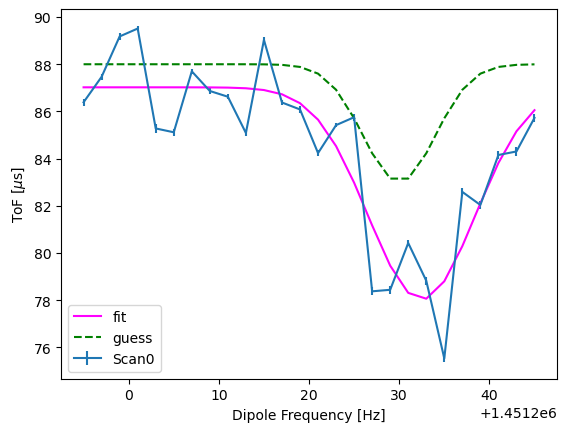

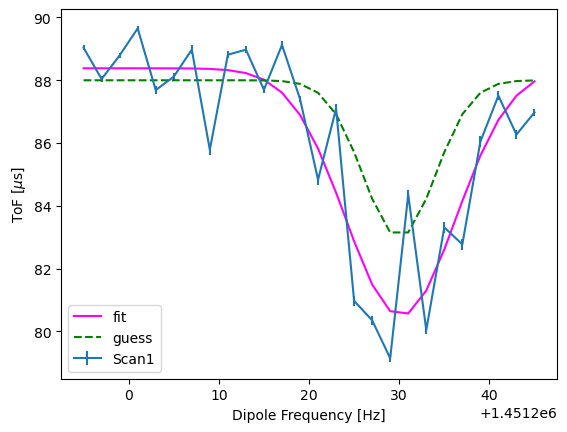

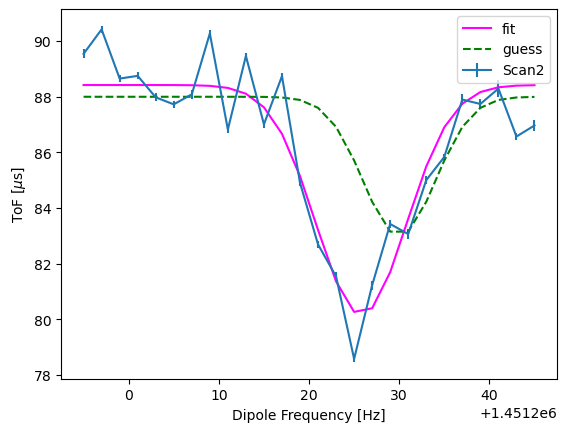

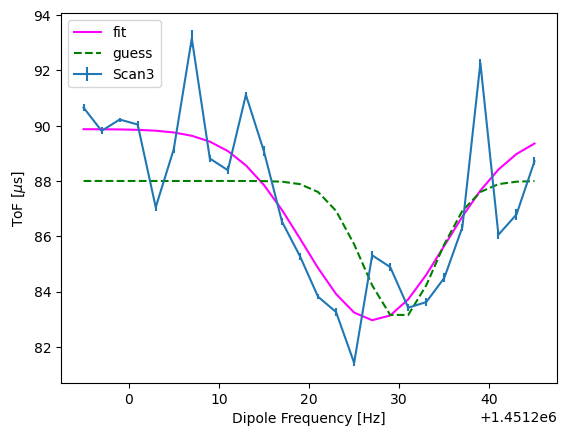

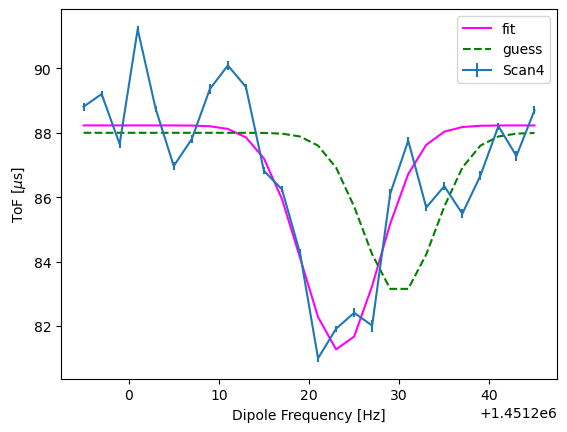

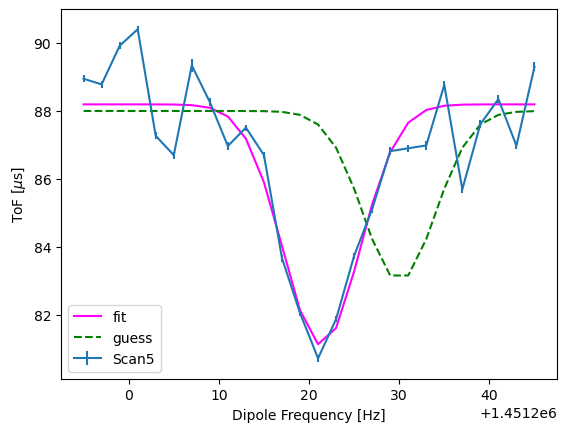

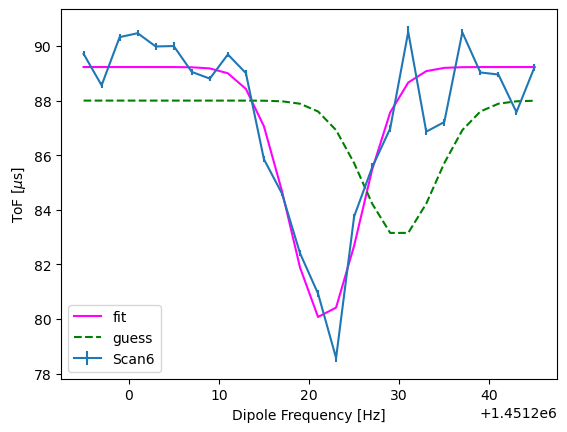

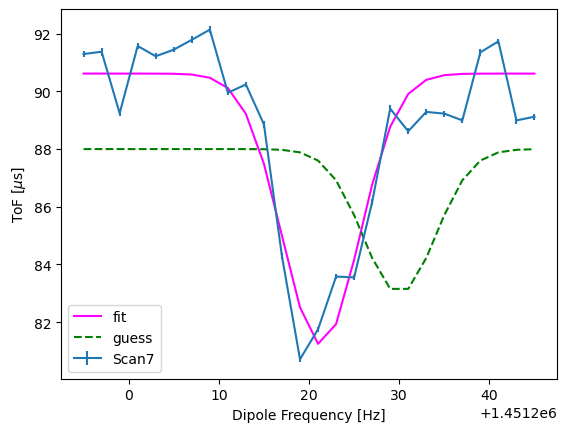

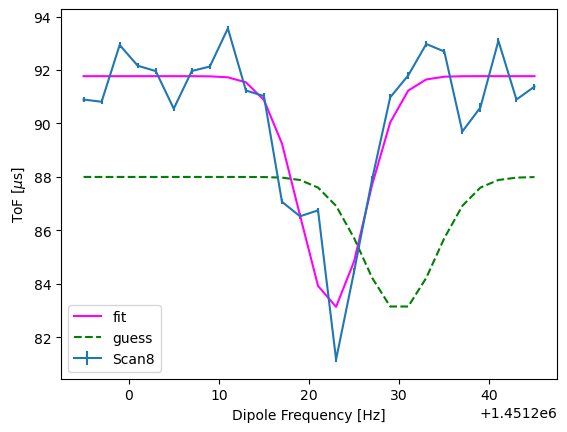

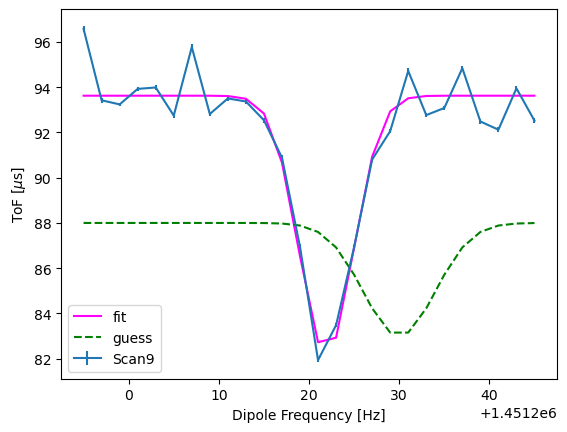

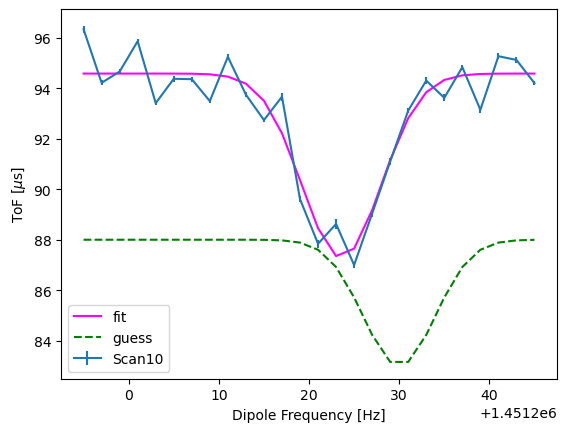

In [5]:
f1 = pd.read_csv("run46887.csv") 
f1 = f1.loc[f1['tof']<=200]

# fit_ref(data frame, center frequency, deviation, npoints, [amplitude, frequency, sigma, average tof], tof cut)

centre_freq1, err_center_freq1, capture_times1 = fit_ref(f1, 1451220, 25, 25, [5, 1451230, 4, 88], 200) 

# green line is your guess fit
# orange line is your fit
# blue is your data

# once fit is completed, adjust [] parameters to optimize fits 

[1.06608442e+01 1.45122956e+06 5.73936493e+00 8.72738636e+01]
[1.17842395e+01 1.45122535e+06 5.55736284e+00 8.93756508e+01]
[8.70942991e+00 1.45122512e+06 9.43424955e+00 9.11028058e+01]
[7.82201477e+00 1.45122192e+06 5.29757179e+00 8.85018963e+01]
[7.77616784e+00 1.45122062e+06 5.00000000e+00 8.81583578e+01]
[7.87444887e+00 1.45122094e+06 5.10715101e+00 8.79567787e+01]
[6.90915927e+00 1.45122017e+06 5.00000000e+00 8.82195869e+01]
[6.57157845e+00 1.45121815e+06 5.13606194e+00 9.00727055e+01]
[8.26887660e+00 1.45122091e+06 5.00000000e+00 9.20106273e+01]
[8.36336146e+00 1.45122184e+06 5.00000000e+00 9.32626612e+01]
[6.84294010e+00 1.45122182e+06 5.00000000e+00 9.40973115e+01]


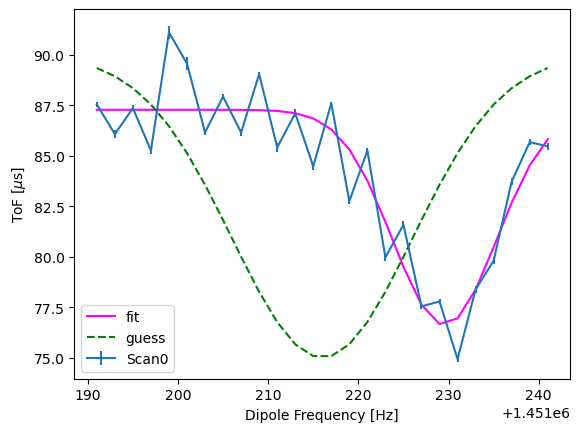

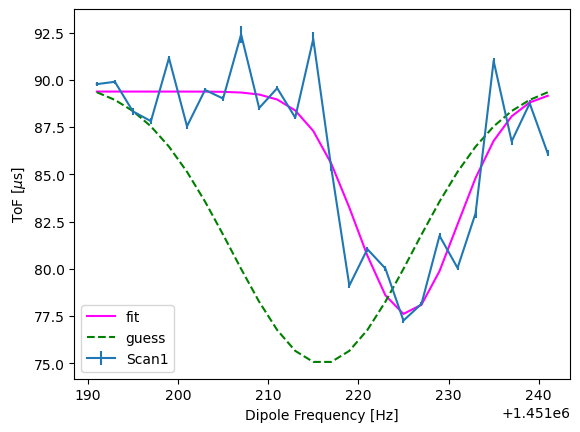

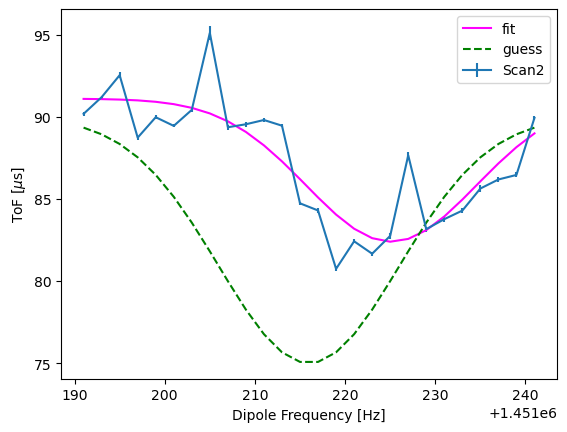

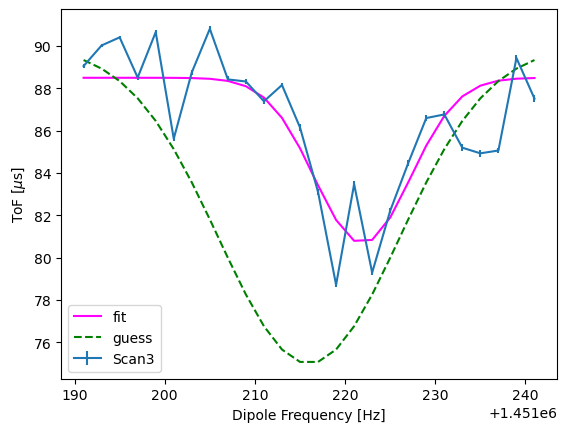

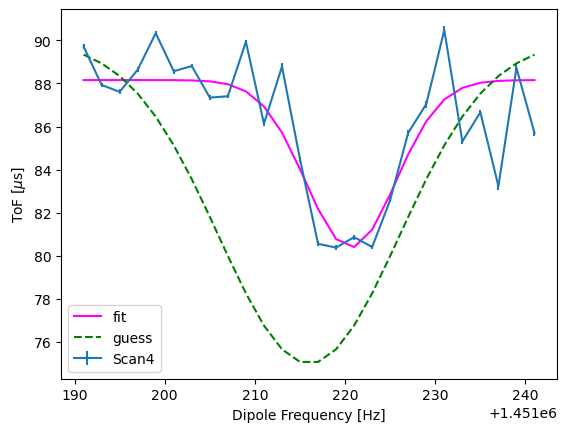

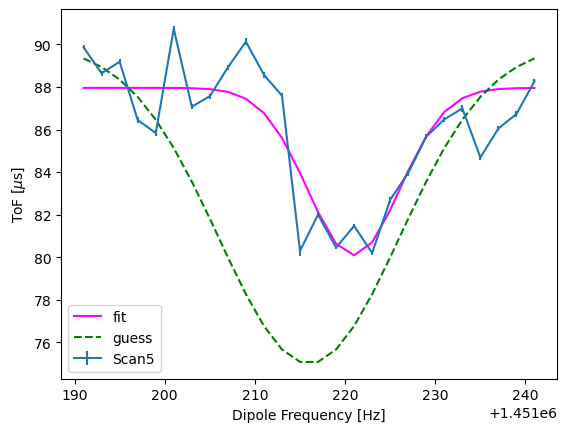

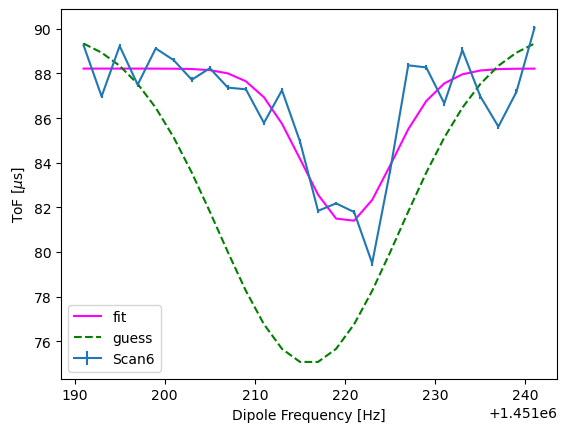

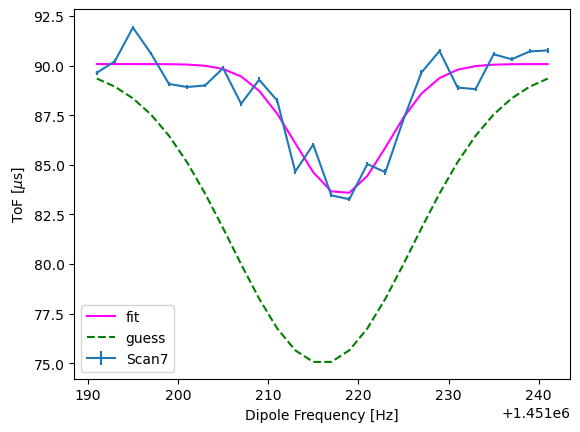

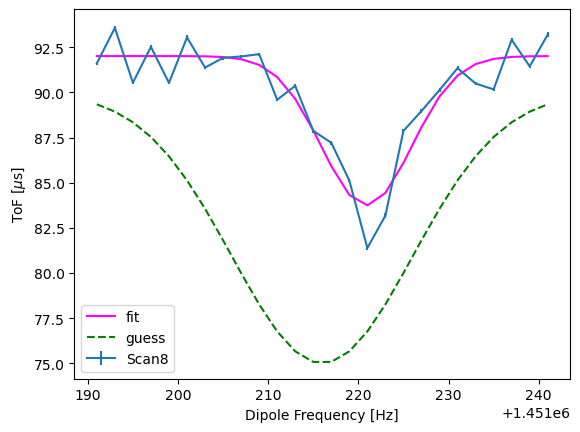

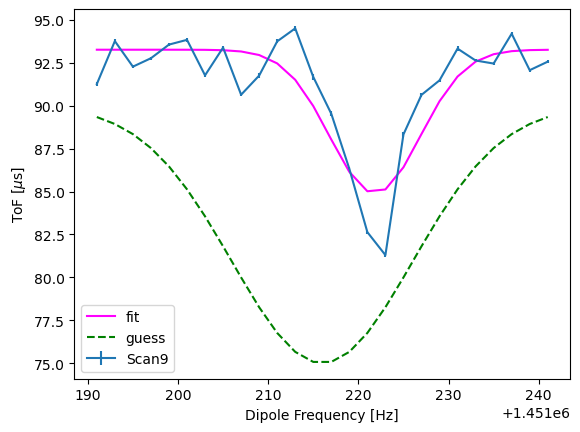

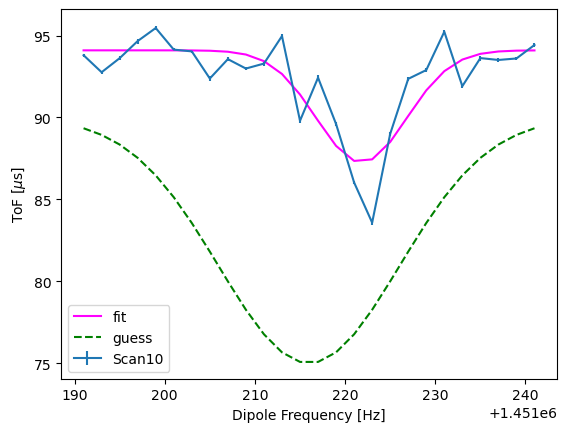

In [6]:
f2 = pd.read_csv("run46888.csv") 
f2 = f2.loc[f2['tof']<=200]

centre_freq2, err_center_freq2, capture_times2 = fit_ref(f2, 1451216, 25, 25, [15, 1451216, 10,90], 200)

[1.20287588e+01 1.45122258e+06 5.33787664e+00 8.75917513e+01]
[1.44538023e+01 1.45122179e+06 5.00000000e+00 8.85915639e+01]
[1.03796722e+01 1.45122164e+06 7.32674819e+00 8.92266916e+01]
[9.36170863e+00 1.45122053e+06 6.13281871e+00 8.90180883e+01]
[4.95060971e+00 1.45121702e+06 5.00000000e+00 8.71366132e+01]
[6.26381606e+00 1.45122022e+06 6.07143613e+00 8.73264158e+01]
[7.49912753e+00 1.45121759e+06 5.00000614e+00 8.83234950e+01]
[6.65759745e+00 1.45121770e+06 5.00000915e+00 8.96371137e+01]
[7.48252107e+00 1.45121860e+06 5.00000000e+00 9.19122454e+01]
[6.06784826e+00 1.45121890e+06 5.00000000e+00 9.26290163e+01]
[8.38816708e+00 1.45121965e+06 5.00000000e+00 9.43490091e+01]


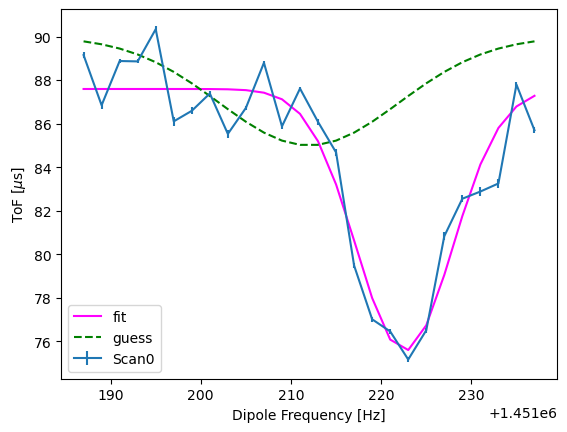

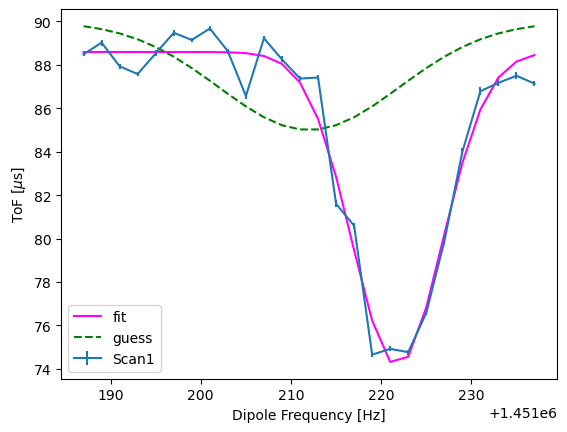

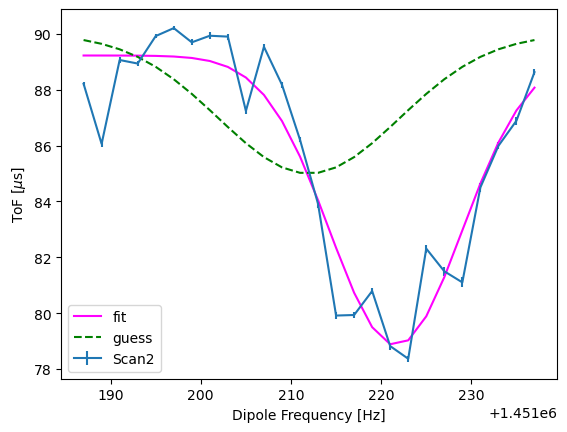

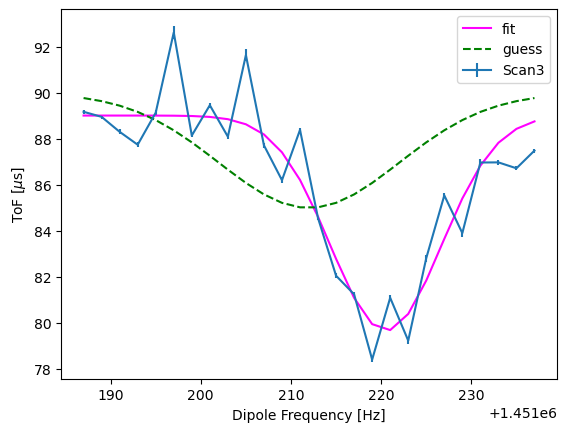

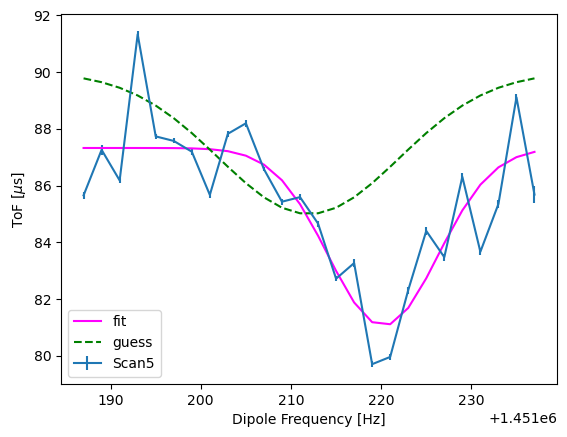

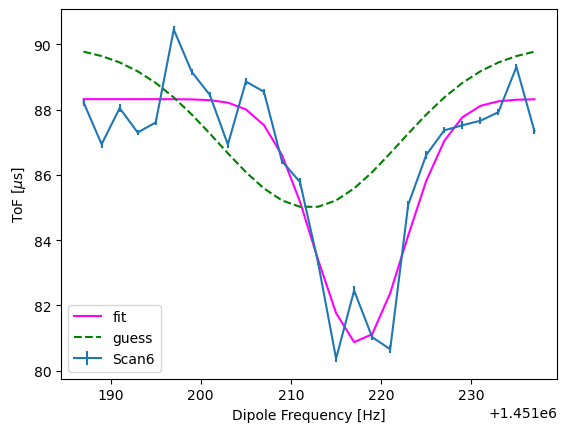

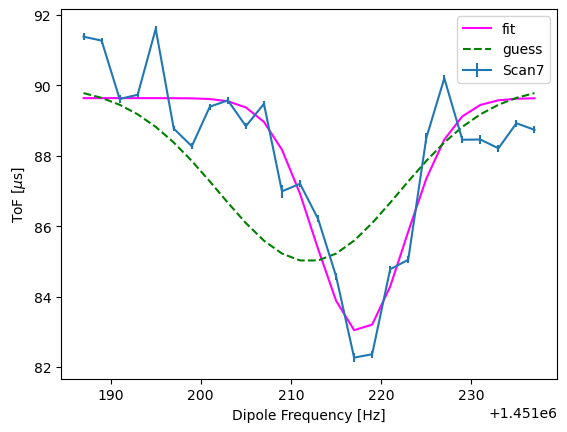

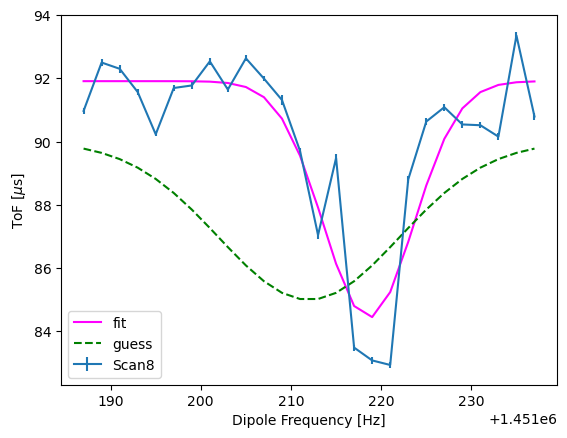

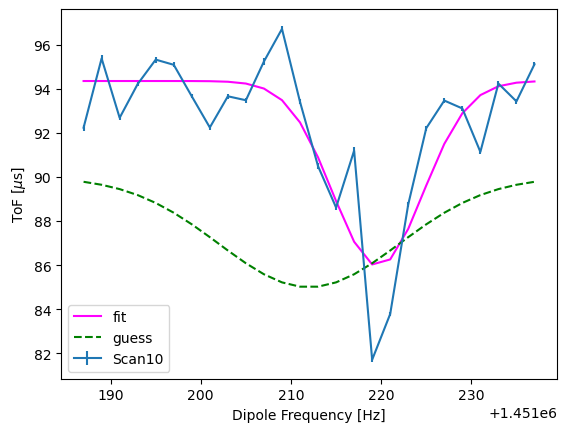

In [7]:
f3 = pd.read_csv("run46889.csv") 
f3 = f3.loc[f3['tof']<=200]

centre_freq3, err_center_freq3, capture_times3  = fit_ref(f3, 1451212, 25, 25, [5, 1451212, 10,90], 200)

[1.17154159e+01 1.45121754e+06 5.00000001e+00 8.60388625e+01]
[1.17053441e+01 1.45121758e+06 5.00000000e+00 8.71392777e+01]
[1.23433771e+01 1.45121613e+06 5.00000022e+00 8.83565319e+01]
[1.19117344e+01 1.45121599e+06 5.00000000e+00 8.87204351e+01]
[9.91408955e+00 1.45121530e+06 5.00000001e+00 8.79584155e+01]
[1.02669172e+01 1.45121494e+06 5.00000001e+00 8.81010484e+01]
[7.96181361e+00 1.45121499e+06 5.00001644e+00 8.83967611e+01]
[1.03986022e+01 1.45121515e+06 5.00000057e+00 9.05184751e+01]
[8.56388588e+00 1.45121641e+06 5.00000001e+00 9.21503481e+01]
[6.74410188e+00 1.45121698e+06 5.00001425e+00 9.30722065e+01]
[5.31975359e+00 1.45121884e+06 5.00000000e+00 9.35861655e+01]


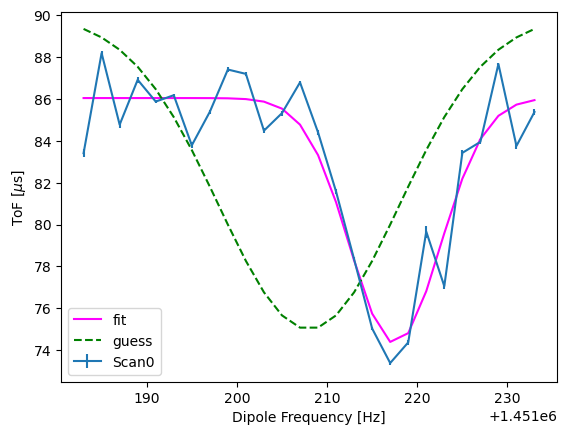

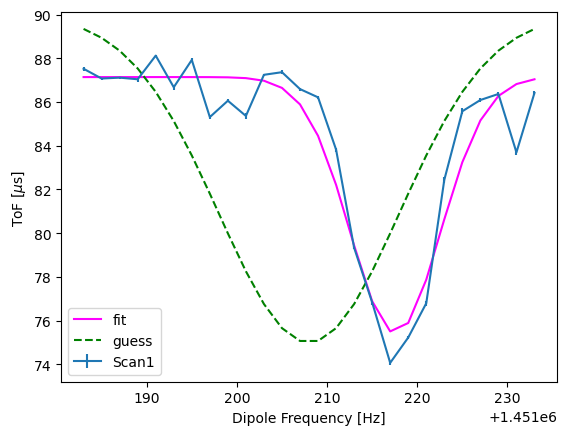

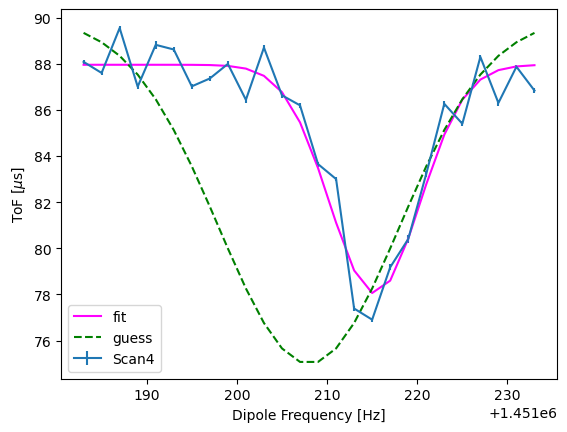

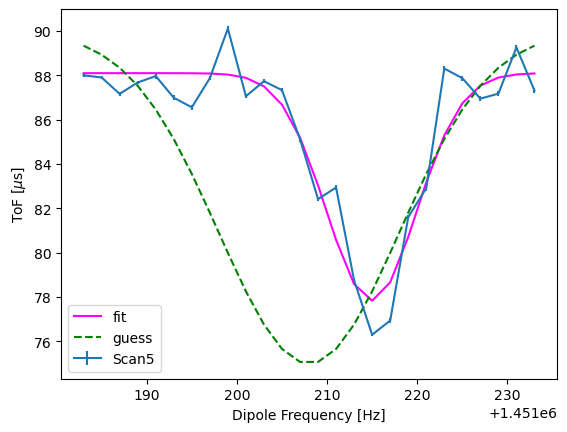

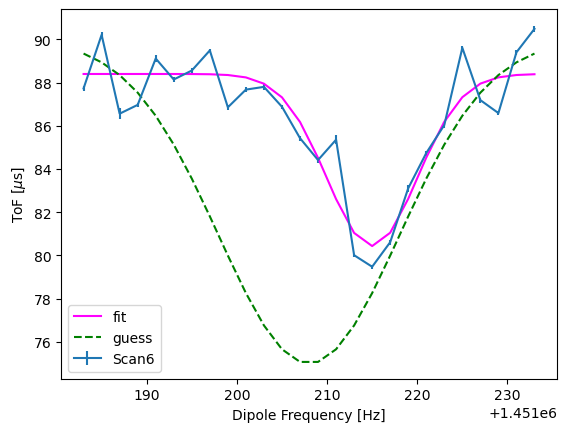

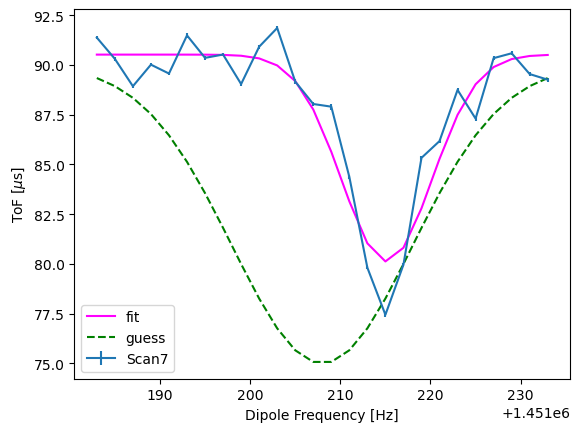

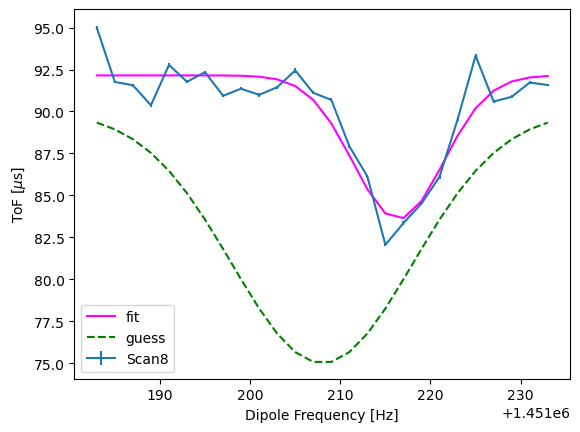

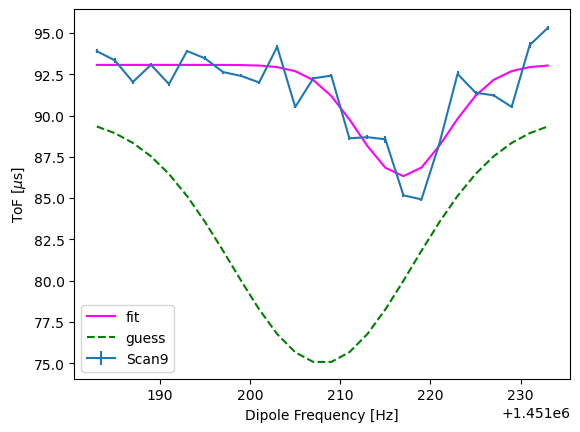

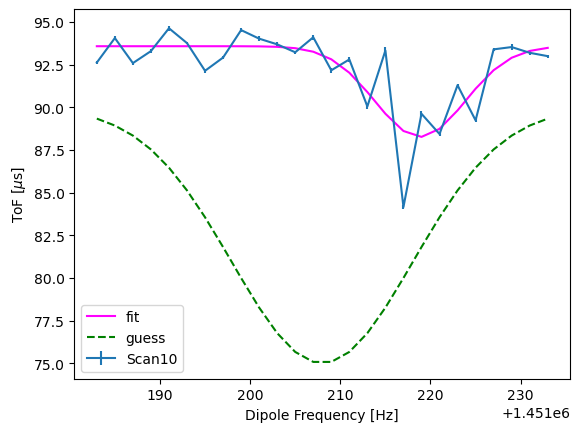

In [8]:
f4 = pd.read_csv("run46890.csv") 
f4 = f4.loc[f4['tof']<=200]

centre_freq4, err_center_freq4, capture_times4  = fit_ref(f4, 1451208, 25, 25, [15, 1451208, 10,90], 200)

[1.47106786e+01 1.45121274e+06 5.00045757e+00 8.79057403e+01]
[1.34633199e+01 1.45121227e+06 5.00000000e+00 8.83738657e+01]
[1.41038191e+01 1.45121156e+06 5.00000000e+00 8.87041281e+01]
[1.22362668e+01 1.45121125e+06 5.00000001e+00 8.90333868e+01]
[1.16030873e+01 1.45121196e+06 5.00000005e+00 8.86988726e+01]
[1.12762936e+01 1.45121203e+06 5.00000003e+00 8.82723701e+01]
[9.62918482e+00 1.45121234e+06 5.00000000e+00 8.93298085e+01]
[8.20978391e+00 1.45121314e+06 5.00097498e+00 9.01143822e+01]
[6.27353946e+00 1.45121376e+06 5.11751453e+00 9.19775539e+01]
[6.78490044e+00 1.45121489e+06 5.00000012e+00 9.33458027e+01]
[6.62001157e+00 1.45121568e+06 5.00000000e+00 9.41843260e+01]


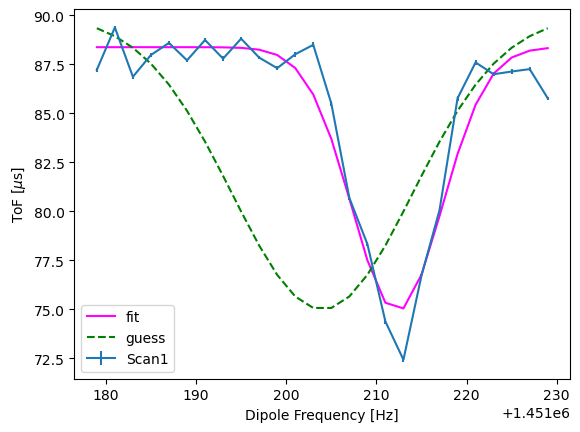

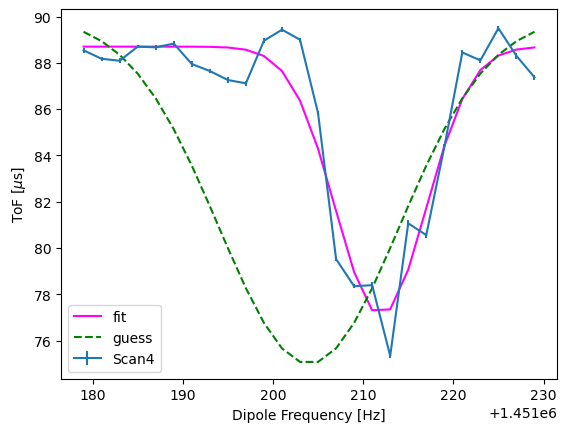

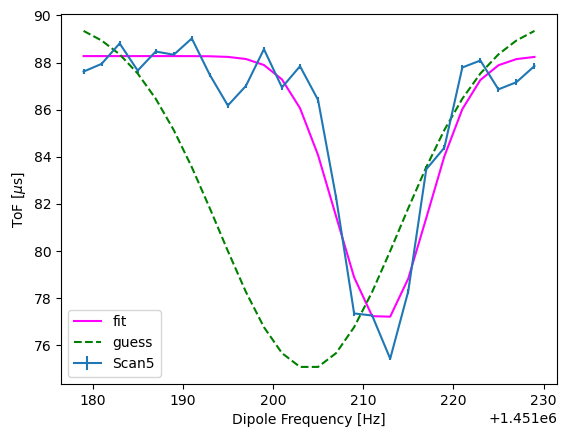

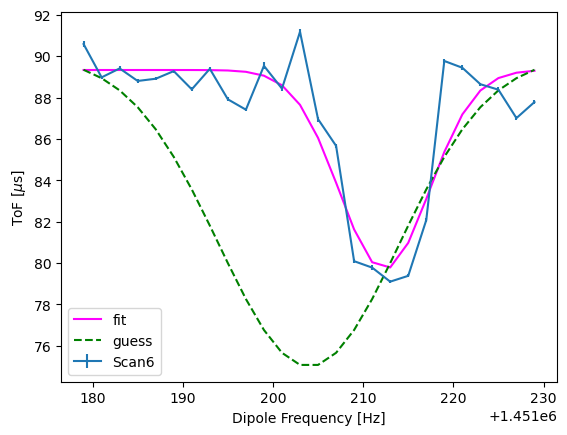

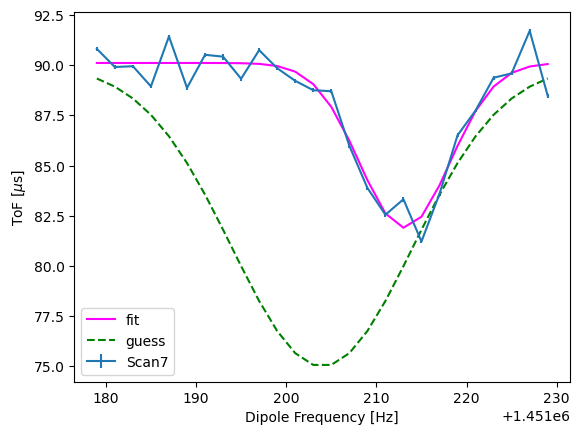

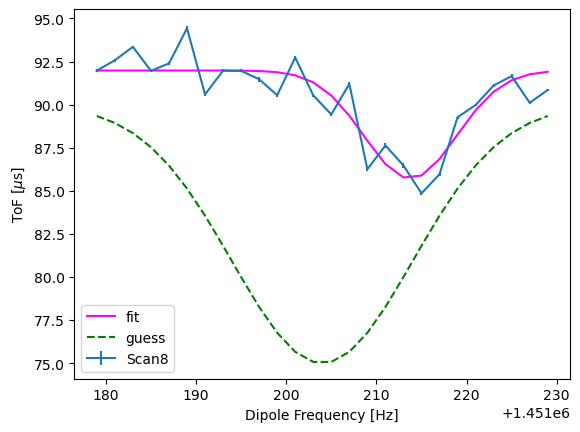

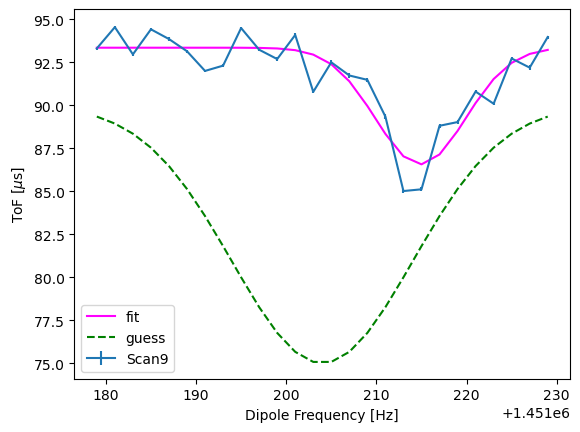

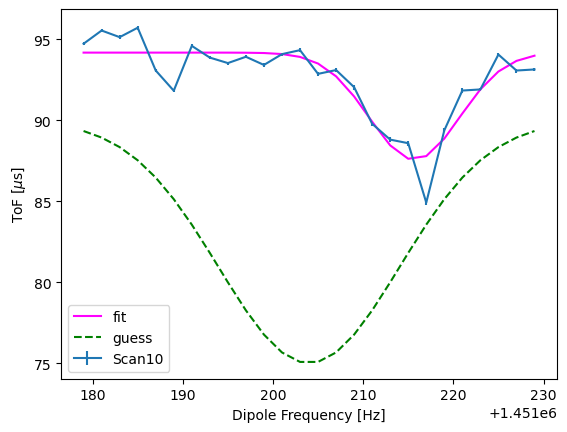

In [9]:
f5 = pd.read_csv("run46891.csv") 
f5 = f5.loc[f5['tof']<=200]

centre_freq5, err_center_freq5, capture_times5 = fit_ref(f5, 1451204, 25, 25, [15, 1451204, 10,90], 200)

[1.28342290e+01 1.45120639e+06 5.00000013e+00 8.74259533e+01]
[1.39415858e+01 1.45120702e+06 5.00000000e+00 8.83210527e+01]
[1.37187193e+01 1.45120739e+06 5.00000000e+00 8.87100555e+01]
[1.30808735e+01 1.45120686e+06 5.00000000e+00 8.82964579e+01]
[9.61972493e+00 1.45120782e+06 5.00000000e+00 8.80228043e+01]
[9.43675202e+00 1.45120850e+06 5.00000000e+00 8.75863615e+01]
[9.84847320e+00 1.45120889e+06 5.25771490e+00 8.88719412e+01]
[5.93669504e+00 1.45121045e+06 5.00000001e+00 8.89930232e+01]
[5.88305363e+00 1.45121112e+06 5.00007897e+00 9.09278572e+01]
[5.00000000e+00 1.45121459e+06 1.49999993e+01 9.42139964e+01]
[5.00000000e+00 1.45121318e+06 1.50000000e+01 9.54833090e+01]


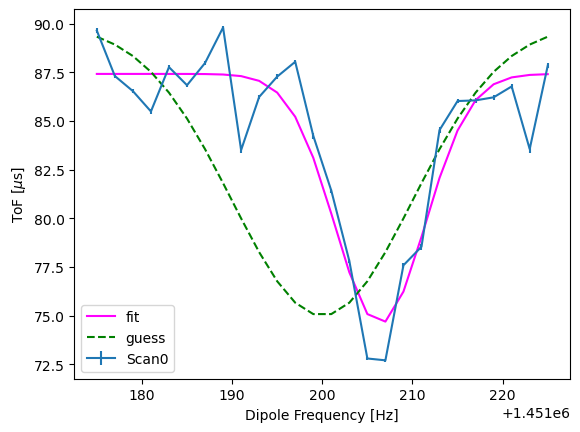

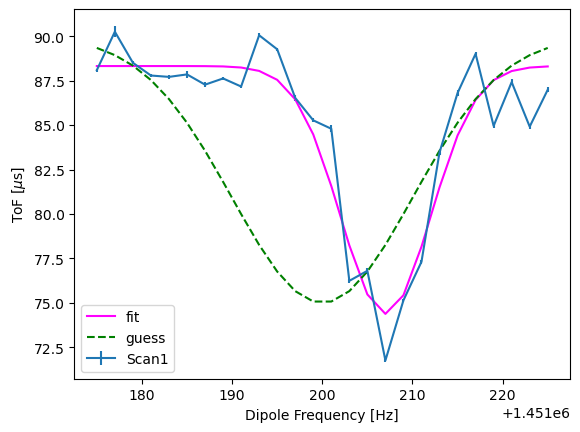

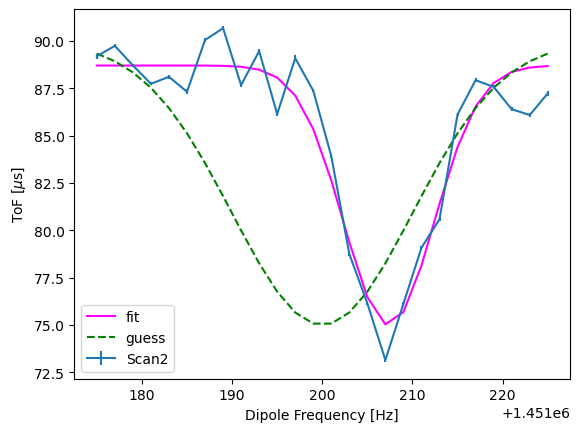

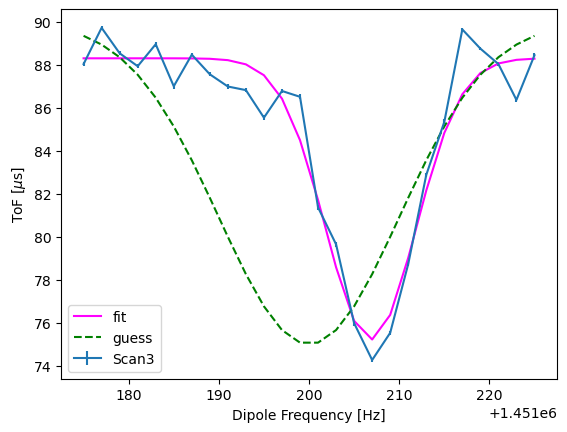

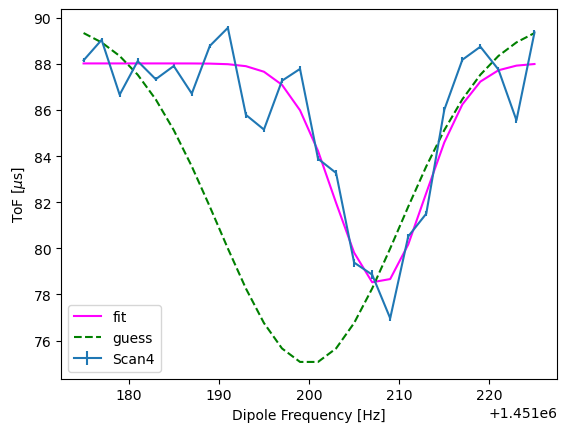

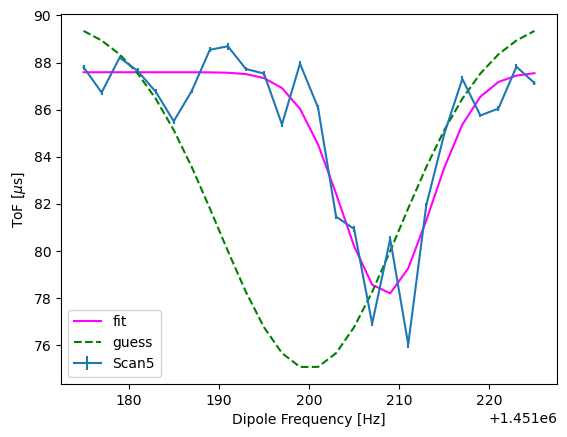

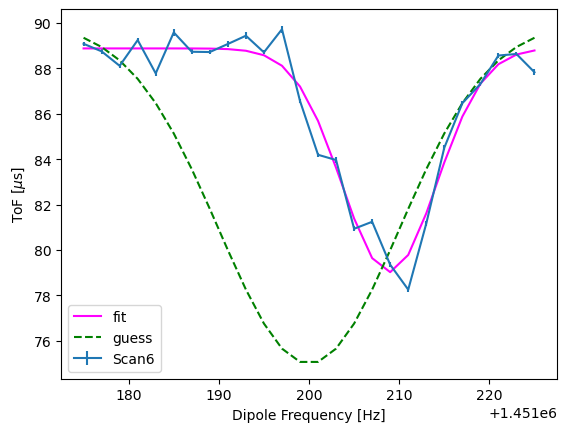

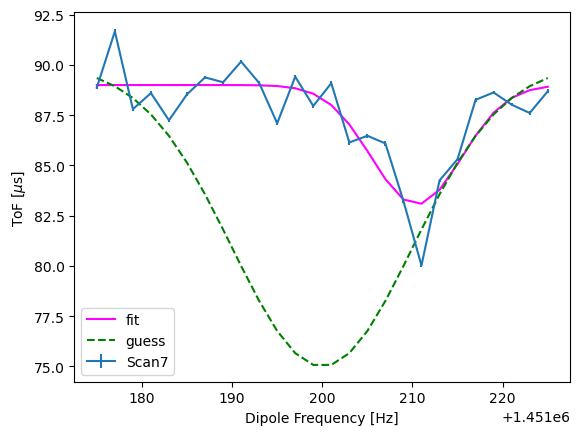

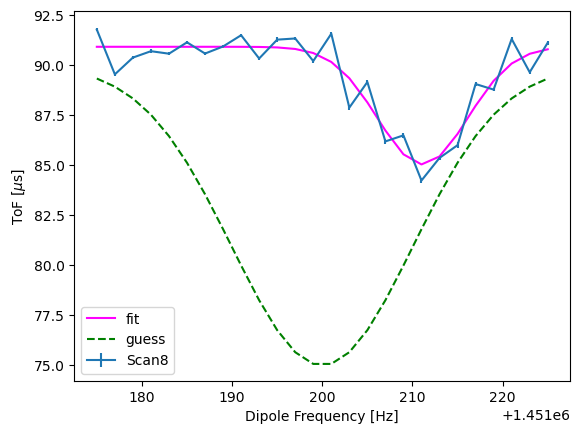

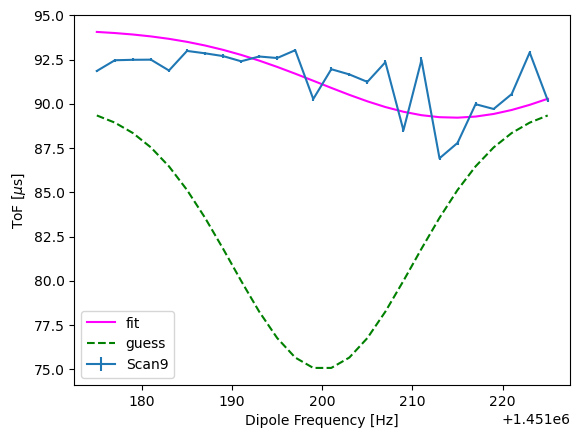

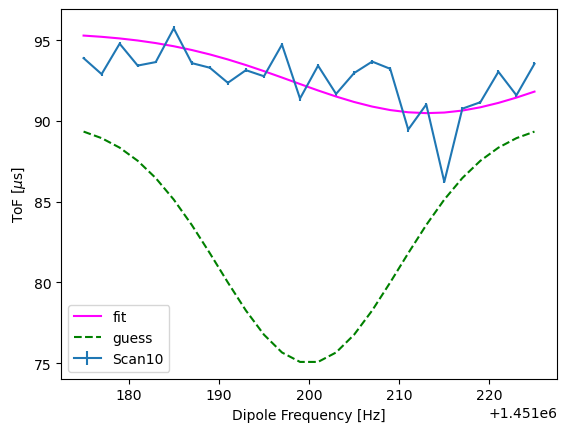

In [10]:
f6 = pd.read_csv("run46892.csv") 
f6 = f6.loc[f6['tof']<=200]

centre_freq6, err_center_freq6, capture_times6 = fit_ref(f6, 1451200, 25, 25, [15, 1451200, 10,90], 200)

[1.08250008e+01 1.45120147e+06 5.00000000e+00 8.67011144e+01]
[1.11847767e+01 1.45120270e+06 5.00000000e+00 8.75779821e+01]
[1.17599107e+01 1.45120256e+06 5.00000000e+00 8.80848221e+01]
[1.05648693e+01 1.45120299e+06 5.00000169e+00 8.82287505e+01]
[8.67282611e+00 1.45120402e+06 5.00000000e+00 8.78521187e+01]
[7.86185687e+00 1.45120544e+06 5.00091792e+00 8.78100184e+01]
[8.12679397e+00 1.45120548e+06 5.00000001e+00 8.83955787e+01]
[6.68522026e+00 1.45120802e+06 5.00071568e+00 8.94822680e+01]
[6.19766434e+00 1.45120864e+06 5.00000010e+00 9.14408257e+01]
[5.00000001e+00 1.45121071e+06 5.00007281e+00 9.27888298e+01]
[5.04602130e+00 1.45121370e+06 5.00000000e+00 9.37323311e+01]


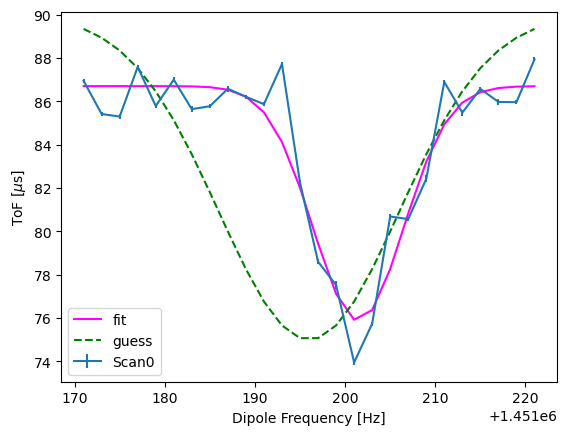

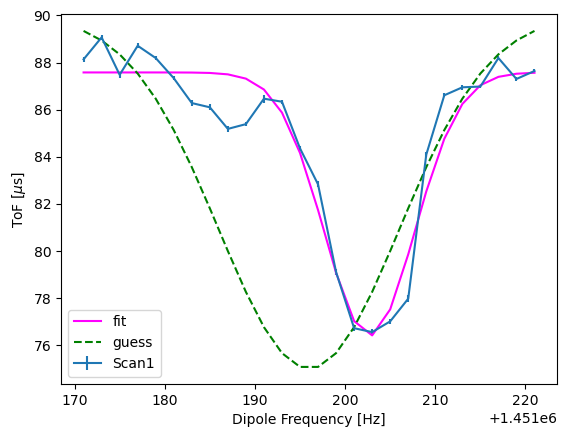

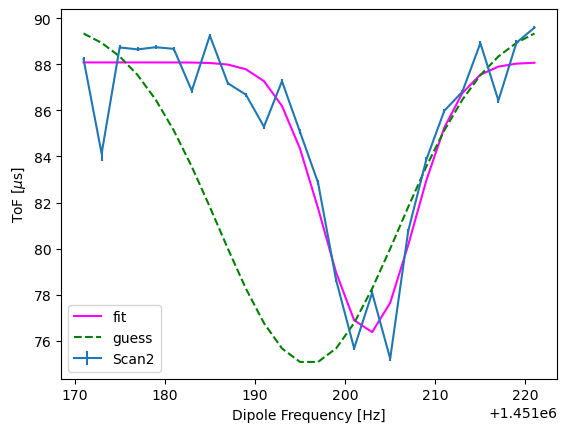

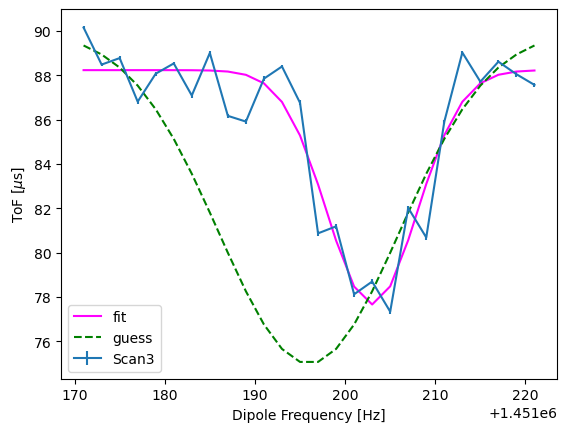

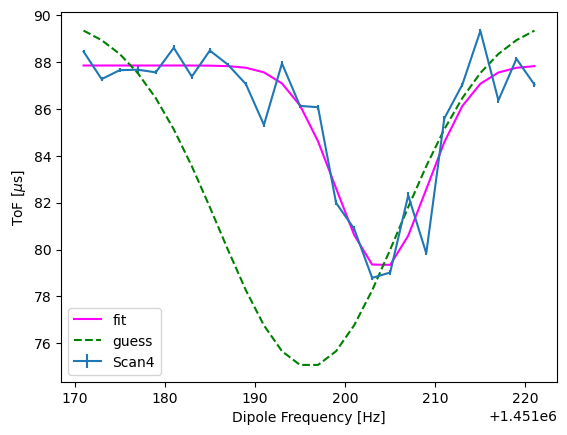

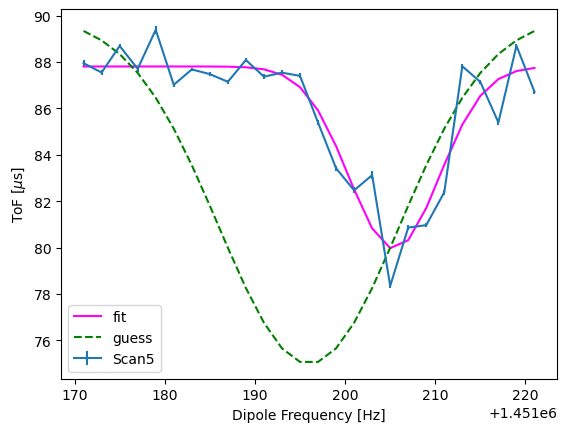

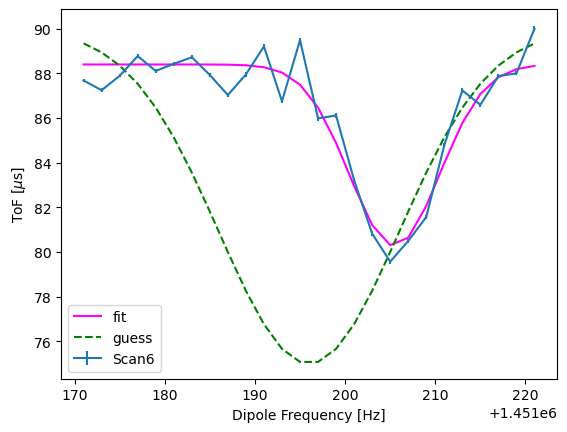

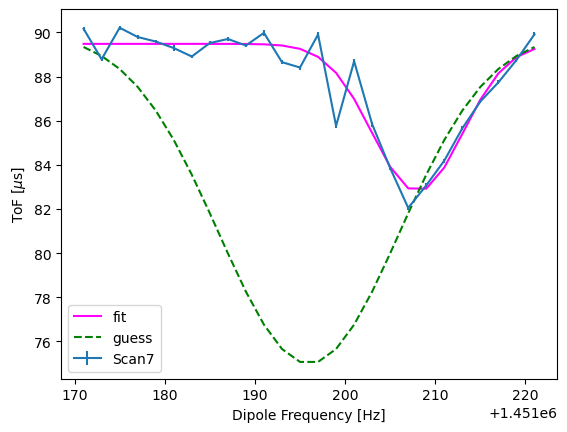

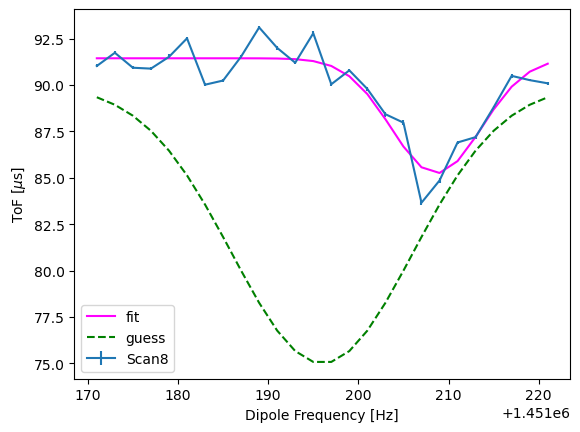

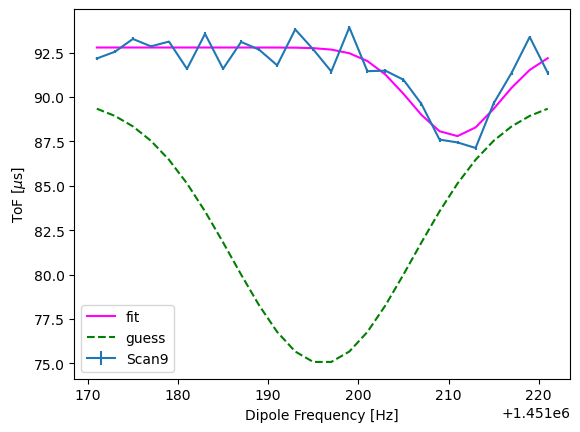

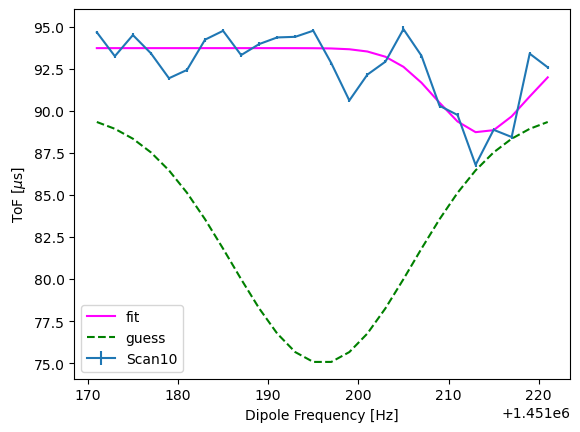

In [11]:
f7 = pd.read_csv("run46893.csv") 
f7 = f7.loc[f7['tof']<=200]

centre_freq7, err_center_freq7, capture_times7 = fit_ref(f7, 1451196, 25, 25, [15, 1451196, 10,90], 200)

#### plotting time! 

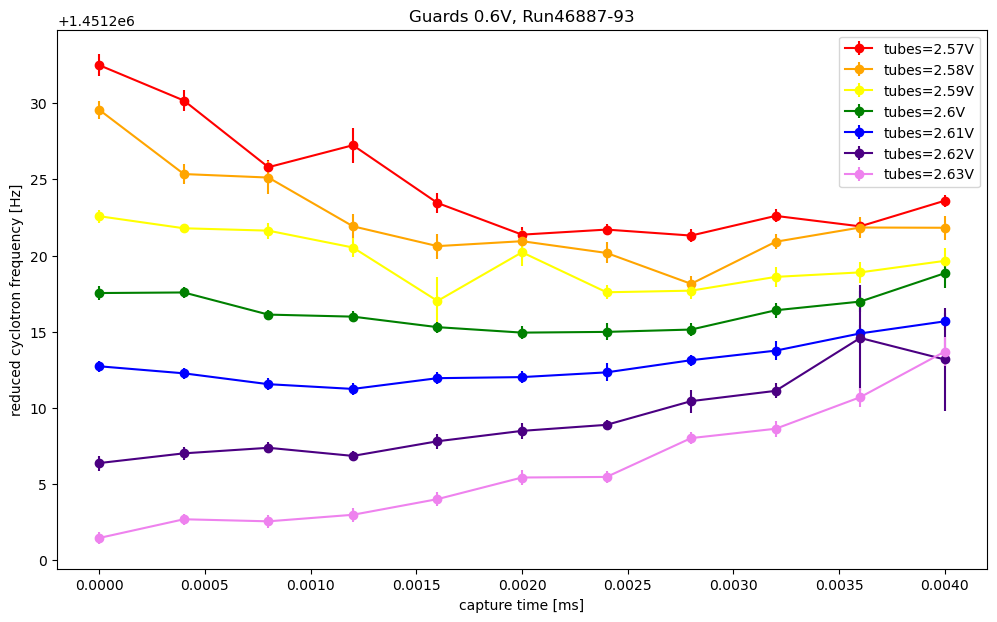

In [13]:
plt.figure(figsize=(12, 7))


plt.errorbar(capture_times1, centre_freq1, err_center_freq1, marker = 'o', color='red',label='tubes=2.57V')
plt.errorbar(capture_times2, centre_freq2, err_center_freq2, marker = 'o', color='orange',label='tubes=2.58V')
plt.errorbar(capture_times3, centre_freq3, err_center_freq3, marker = 'o', color='yellow',label='tubes=2.59V')
plt.errorbar(capture_times4, centre_freq4, err_center_freq4, marker = 'o', color='green',label='tubes=2.6V')
plt.errorbar(capture_times5, centre_freq5, err_center_freq5, marker = 'o', color='blue',label='tubes=2.61V')
plt.errorbar(capture_times6, centre_freq6, err_center_freq6, marker = 'o', color='indigo',label='tubes=2.62V')
plt.errorbar(capture_times7, centre_freq7, err_center_freq7, marker = 'o', color='violet',label='tubes=2.63V')

plt.xlabel('capture time [ms]')
plt.ylabel('reduced cyclotron frequency [Hz]')
plt.title('Guards 0.6V, Run46887-93')
plt.legend()

#plt.savefig('compensation_scan_guard_value_0dot7_run46887-93.png', dpi = 100)